In [ ]:
from google.colab import files


uploaded = files.upload()


Saving tested.csv to tested.csv


In [ ]:
# import necessary dataset
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## **Data exploration**


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.shape

(418, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [ ]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [ ]:
# data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,NaN,1


##**Data Visualization**

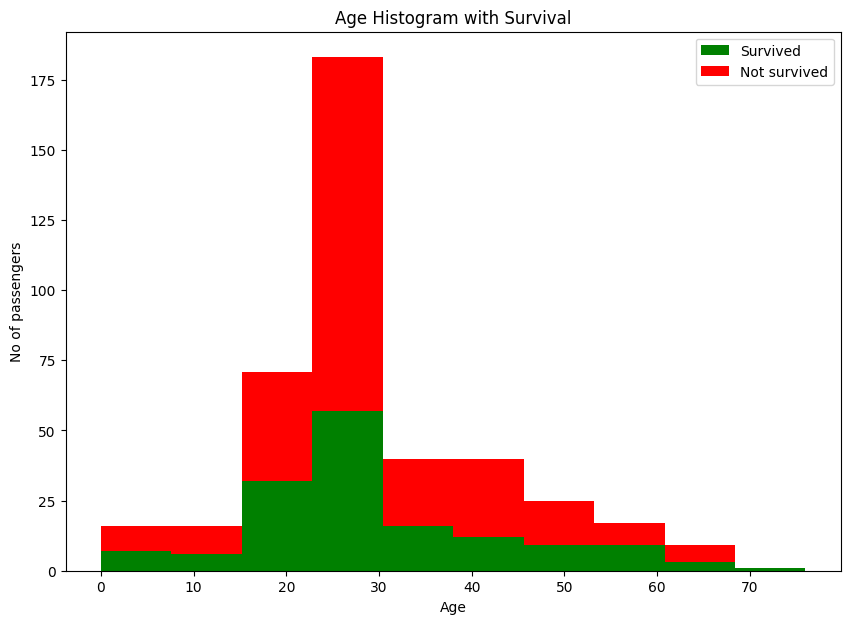

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

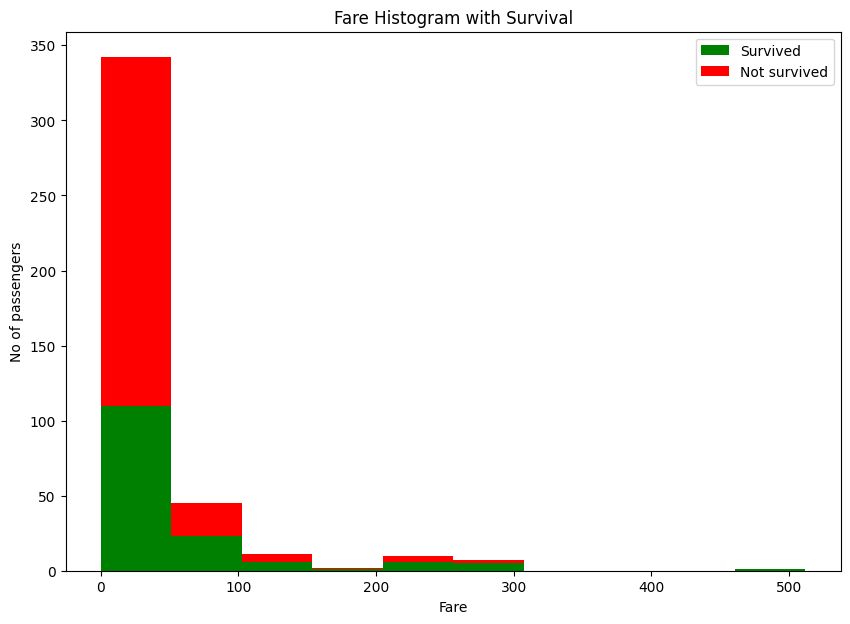

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

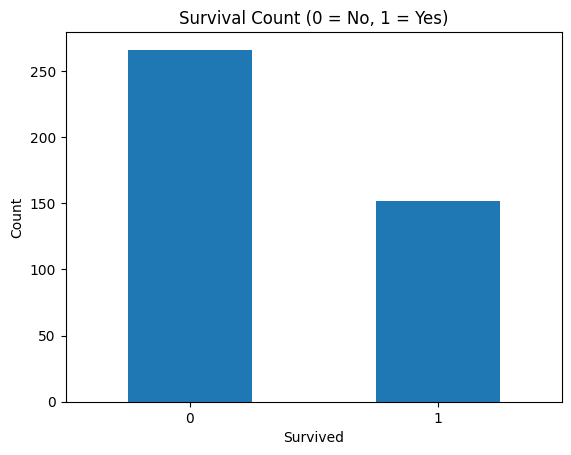

In [ ]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

In [ ]:
def survival_percentage(data, column_name):
    unique_values = data[column_name].unique()

    percentages = {}

    for value in unique_values:
        subset = data[data[column_name] == value]
        survived_count = subset["Survived"].sum()
        total_count = len(subset)
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            percentages[value] = percentage

    return percentages

In [ ]:
def draw_pie_chart(percentages):
    labels = percentages.keys()
    sizes = list(percentages.values())  # Convert dict_values to a list

    # Generate a list of shades of blue based on the number of categories
    num_categories = len(labels)
    colors = plt.cm.Blues(np.linspace(0.1, 1, num_categories))

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.pie(sizes, labels=None, colors=colors, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Survival Percentage by Category')

    # Add custom legend
    legend_labels = [f'{label} ({sizes[i]:.1f}%)' for i, label in enumerate(labels) if sizes[i] > 0]
    plt.legend(legend_labels, loc='best')

    plt.show()

precentage of 0 who survived: 0.00%
precentage of 1 who survived: 100.00%


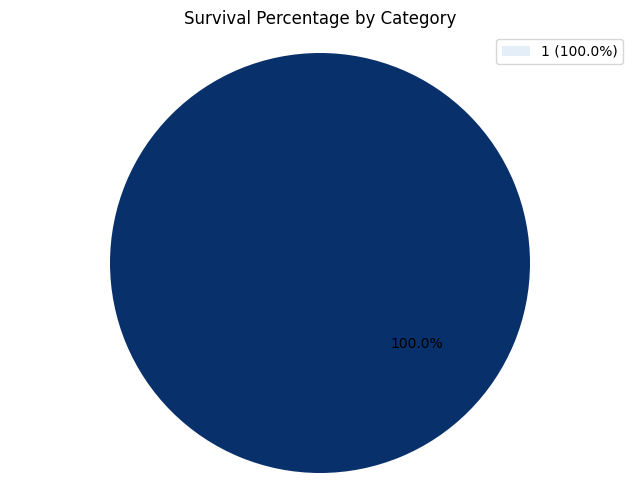

In [ ]:
sex_result = survival_percentage(df, "Sex")

for key, value in sex_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")

draw_pie_chart(sex_result)

In [ ]:
def histogram_rep(df,col_name, total_rows,x_label, x_labels, title, figsize):
    numeric_data = pd.to_numeric(df[col_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{col_name}' column: {percentage_non_numeric:.2f}%")

    # Get unique values in the 'previous' column
    unique_values = df[col_name].unique()
    print("Unique values in '{col_name}' column:")

    # Calculate the percentage of each unique value
    percentage_values = []
    for value in unique_values:
        count = (df[col_name] == value).sum()
        percentage = (count / total_rows) * 100
        percentage_values.append(percentage)
        print(f"Value: {value}, Percentage: {percentage:.2f}%")

    # Create a histogram
    plt.figure(figsize=figsize)
    plt.bar(unique_values, percentage_values)
    plt.xlabel(x_label)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.xticks(unique_values, x_labels)
    plt.show()

In [ ]:
def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [ ]:
def get_null_percentage(dataframe):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(dataframe)

    # Calculate the percentage of null values for each feature
    null_percentage = (dataframe.isnull().sum() / total_rows) * 100

    return null_percentage

In [ ]:
features = ['Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']
null_percentage = get_null_percentage(df[features])

# Print the null percentage for each feature
print("Percentage of null values for each feature:")
print(null_percentage,"%")

Percentage of null values for each feature:
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       78.229665
Embarked     0.000000
Survived     0.000000
dtype: float64 %


In [ ]:
df['Title'] = df.apply(lambda row: find_between(row['Name'], ", ", "."), axis=1)
features.append('Title')
df.drop(columns=['Name'], inplace=True)
print(df['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


Percentage of non-numerical values in the 'Title' column: 100.00%
Unique values in '{col_name}' column:
Value: Mr, Percentage: 57.42%
Value: Mrs, Percentage: 17.22%
Value: Miss, Percentage: 18.66%
Value: Master, Percentage: 5.02%
Value: Ms, Percentage: 0.24%
Value: Col, Percentage: 0.48%
Value: Rev, Percentage: 0.48%
Value: Dr, Percentage: 0.24%
Value: Dona, Percentage: 0.24%


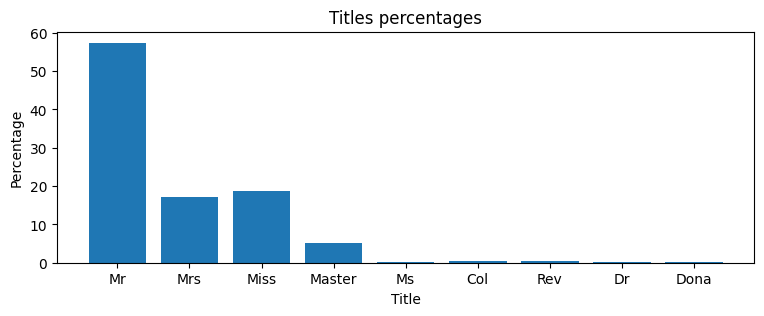

In [ ]:
col_name = 'Title'
x_label = 'Title'
title = 'Titles percentages'
figsize = (9, 3)
x_labels = ['Mr', 'Mrs', 'Miss','Master','Ms','Col', 'Rev', 'Dr', 'Dona']

histogram_rep(df,col_name, len(df), x_label, x_labels, title, figsize)

precentage of Mr who survived: 0.00%
precentage of Mrs who survived: 100.00%
precentage of Miss who survived: 100.00%
precentage of Master who survived: 0.00%
precentage of Ms who survived: 100.00%
precentage of Col who survived: 0.00%
precentage of Rev who survived: 0.00%
precentage of Dr who survived: 0.00%
precentage of Dona who survived: 100.00%


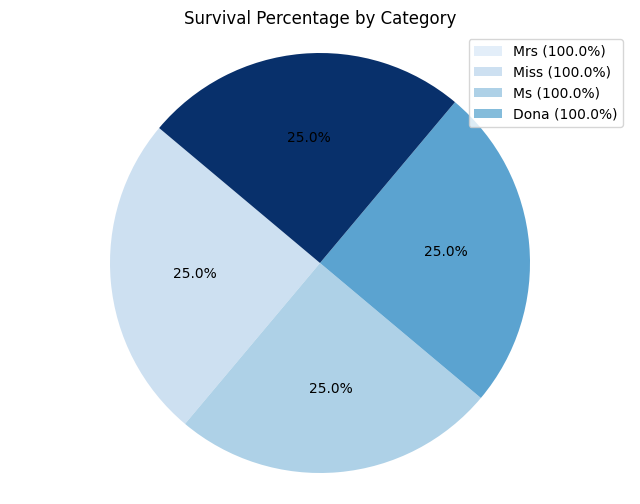

In [ ]:
title_result = survival_percentage(df, "Title")

for key, value in title_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")

draw_pie_chart(title_result)

precentage of 0 who survived: 52.17%
precentage of 1 who survived: 32.59%
precentage of 2 who survived: 39.22%


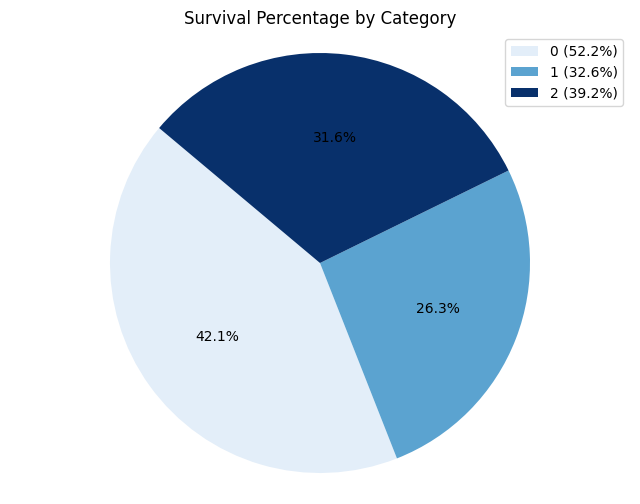

In [ ]:
embarked_result = survival_percentage(df, "Embarked")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")

draw_pie_chart(embarked_result)

Percentage of non-numerical values in the 'Pclass' column: 0.00%
Unique values in '{col_name}' column:
Value: 3, Percentage: 52.15%
Value: 2, Percentage: 22.25%
Value: 1, Percentage: 25.60%


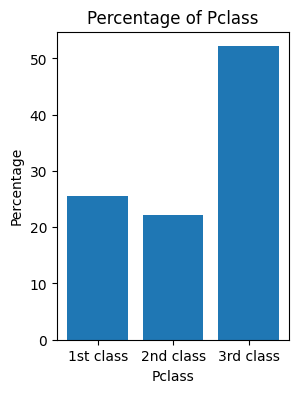

In [ ]:
col_name = 'Pclass'
x_label = 'Pclass'
x_labels = ['3rd class', '2nd class', '1st class']
title = 'Percentage of Pclass'
figsize = (3,4)

histogram_rep(df,col_name, len(df),x_label, x_labels, title, figsize)

precentage of 3 who survived: 33.03%
precentage of 2 who survived: 32.26%
precentage of 1 who survived: 46.73%


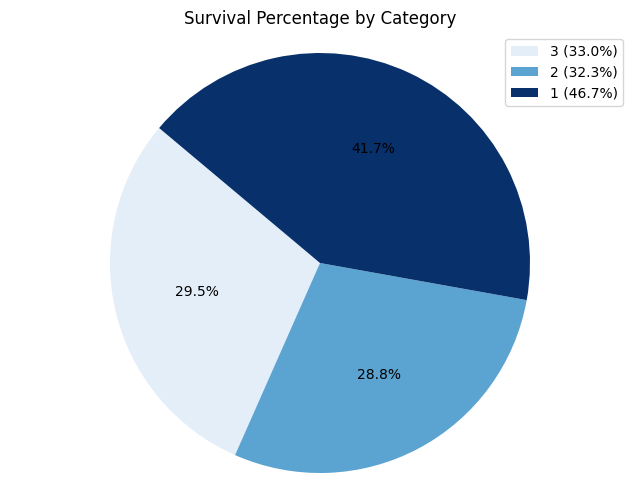

In [ ]:
embarked_result = survival_percentage(df, "Pclass")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")

draw_pie_chart(embarked_result)

**Model**

In [ ]:
use_features = ['Pclass', 'Sex', 'SibSp', 'Parch']
df = pd.get_dummies(features)

In [ ]:
X = df[use_features]
y = df['Survived']

In [ ]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
   # Define a list of models to try
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=1)),
    ("Logistic Regression", LogisticRegression(random_state=1))
]

best_model = None
best_accuracy = 0.0
for model_name, model in models:
    print(f"Training {model_name}...")

    train_accuracy_list = []
    val_accuracy_list = []
    test_accuracy_list = []

    # Train the model and track accuracy
    for epoch in range(1, 101):  # You can adjust the number of epochs
        model.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)  # Assuming you have a validation set X_val and y_val
        test_predictions = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, train_predictions)
        val_accuracy = accuracy_score(y_val, val_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)

        train_accuracy_list.append(train_accuracy)
        val_accuracy_list.append(val_accuracy)
        test_accuracy_list.append(test_accuracy)
    # Print both train and test accuracy
    print(f"{model_name} Train Accuracy: {train_accuracy:.2%}")
    print(f"{model_name} Validation Accuracy: {val_accuracy:.2%}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.2%}")
    print("\n")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model_name

# Check if all models have similar accuracy
similar_models = all(val == best_accuracy for val in val_accuracy_list)
if similar_models:
    print("All models have similar performance.")
else:
    print(f"The best model is {best_model} with a validation accuracy of {best_accuracy:.2%}")

Training Random Forest...
Random Forest Train Accuracy: 87.50%
Random Forest Validation Accuracy: 100.00%
Random Forest Test Accuracy: 100.00%


Training Gradient Boosting...
Gradient Boosting Train Accuracy: 87.50%
Gradient Boosting Validation Accuracy: 100.00%
Gradient Boosting Test Accuracy: 100.00%


Training Logistic Regression...
Logistic Regression Train Accuracy: 87.50%
Logistic Regression Validation Accuracy: 100.00%
Logistic Regression Test Accuracy: 100.00%


All models have similar performance.
